#### Jonatas Oliveira de Araujo

# Modelo Convolucional 2D

### Modelo Convolucional 2D em Geração de Imagens Sísmicas



# Resumo:
Este relatório descreve o processo de criação de imagens sísmicas utilizando o modelo convolucional 2D (bidimensional) implementadas no Python. A metodologia adotada visa explorar a eficácia do modelo na geração de sismogramas a partir de modelos geológicos representativos de diferentes estruturas de trapas.



# Introdução:

O traço sísmico pode ser visto como a convolução de um pulso de entrada com a função de refletividade. Neste trabalho o pulso de entrada utilizado foi uma wavelet Ricker que convolvido com a refletividade de camadas gerou um conjunto de traços sísmicos.  Esses traços são dispostos lado a lado em suas posições relativas corretas, resultando em um modelo convolucional bidimensional.

Para facilitar o reconhecimento de eventos de reflexão e sua correlação traço a traço nos registros sísmicos, uma metade do traço normal 'ondulado' da forma de onda, as amplitudes positivas dos traços sísmicos, foi hachurado da cor preta gerando assim o ‘wiggle’. A seguir alguns exemplos de modelos geológicos de estruturas de trapas serão apresentados em forma de sismogramas utilizando-se o ‘wiggle’.



# Metodologia:
#### Implementação em Python:

Abaixo, será apresentado a descrição detalhada da implementação do modelo convolucional 2D usando a linguagem de programação Python.

O script que gera o sismograma na forma de wiggle, a wavelet Ricker (pulso de entrada), a função de refletividade e o cálculo da transformada de Fourier está encapsulado em um módulo chamado 'seismic'. No script principal, chamamos esse módulo junto com outras bibliotecas necessárias.


In [ ]:
# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from seismic import wiggle
from seismic import Ricker
from seismic import reflectivity
from seismic import fft_wavelet

Após importar o módulo e as bibliotecas necessárias, iniciamos o projeto criando uma wavelet Ricker, conforme mostrado abaixo:


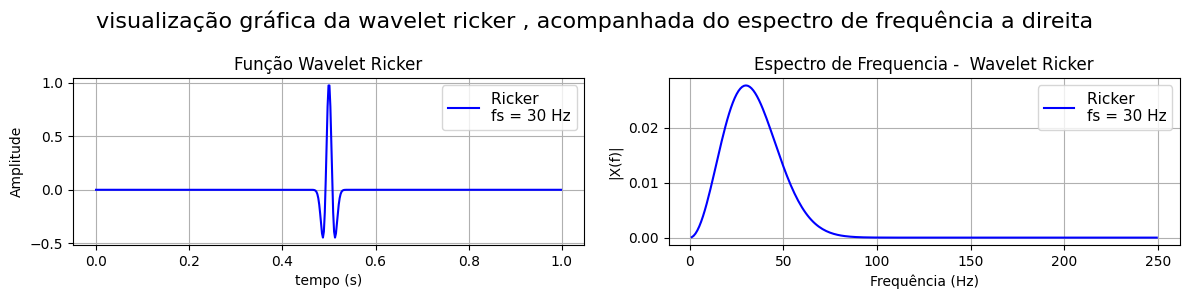

In [ ]:
# Parametros geral
T = 1   # tempo em segundos
dt = 0.002  # taxa de amostragem
n = int((T/dt) + 1) # numero de amostra
t = np.linspace(0, T, n, endpoint=False)   #base de tempo
tlag= 0.5 # Deslocamento no tempo em segundo

fs = 30  #frequencia do sinal ricker

# Função Wavelet Ricker
R = Ricker(fs, t-tlag)
mascara, freqR, fft_absR = fft_wavelet(n, R, dt)

# PLOT DOS GRAFICOS
plt.figure(figsize=(12, 3))
plt.suptitle("visualização gráfica da wavelet ricker , acompanhada do espectro de frequência a direita", fontsize=16)

# Plot wavelet ricker
plt.subplot(1,2,1)
plt.title('Função Wavelet Ricker', fontsize=12)
plt.plot(t, R, 'b',  label="Ricker \nfs = {} Hz".format(fs))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(1,2,2)
plt.title('Espectro de Frequencia -  Wavelet Ricker', fontsize=12)
plt.plot(freqR[mascara], fft_absR[mascara], 'b' , label="Ricker \nfs = {} Hz".format(fs))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

##############################################################################
plt.tight_layout()
#plt.show()

A etapa seguinte envolve a criação de um modelo de velocidade e densidade. Para construir uma seção sísmica, criamos conjuntos de horizontes para "desenhar" as camadas, estruturas e falhas da seção sísmica dos exemplos utilizados neste trabalho.

In [ ]:
"""## Modelo Convolucional 2D """

# Velocidade e Densidade das camadas
vel = np.array([1500, 4000, 2000, 4500, 5000])  # Velocidade
den = np.array([1000, 2600, 1800, 2200, 2500])  # Densidade

# Construção da Matriz de Velocidade e Densidade
nx = 250
velocidade = np.zeros((n, nx)) + vel[0]
densidade = np.zeros((n, nx)) + den[0]

horizon1 = np.zeros(nx,dtype='int')
horizon2 = np.zeros(nx,dtype='int')
horizon3 = np.zeros(nx,dtype='int')
horizon31 = np.zeros(nx,dtype='int')  # Falha do Horizonte 3
horizon4 = np.zeros(nx,dtype='int')
horizon41 = np.zeros(nx,dtype='int')  # Falha no Horizonte 4
horizon5 = np.zeros(nx,dtype='int')

z0, z1, z2, z3, z4, z5, z6 = (n // 3), (n // 2.5), (n // 1.45), (n // 1), (n // 1.53), (n // 1.05), (n // 1)
height, height1, height2, height3, height4 = 60, 90, 70, 90, 170
L, L1, L2, L3, L4 = (2 * nx), (2 * nx), (1.8 * nx), (1.9 * nx), (8 * nx)

for i in range(nx):
    horizon1[i] = int(z0 + height * np.cos(2*np.pi*(i) / L + np.pi))
    horizon2[i] = int(z1 + height1 * np.cos(2*np.pi*(i) / L1 + np.pi))
    horizon3[i] = int(z2 + height2 * np.sin(2*np.pi*(i) / L2 + np.pi))
    horizon31[i] = int(z4 + height2 * np.sin(2*np.pi*(i) / L2 + np.pi))

    horizon4[i] = int(z3 + height3 * np.sin(2*np.pi*(i) / L3 + np.pi))
    horizon41[i] = int(z5 + height3 * np.sin(2*np.pi*(i) / L3 + np.pi))

    horizon5[i] = int(z6 + height4 * np.sin(2*np.pi*(i) / L4 + np.pi))

for i in range(nx):
    for j in range(n):
        if (j >= horizon1[i]):
            velocidade[j,i] = vel[1]
            densidade[j,i] = den[1]
        if (j >= horizon2[i]):
            velocidade[j,i] = vel[2]
            densidade[j,i] = den[2]
        if (j >= horizon3[i]):
            velocidade[j,i] = vel[3]
            densidade[j,i] = den[3]
        elif (j >= horizon31[i]):
            velocidade[j,90:120] = vel[3]
            densidade[j,90:120] = den[3]
        if (j >= horizon4[i]):
            velocidade[j,i] = vel[4]
            densidade[j,i] = den[4]
        if (j >= horizon41[i]):
            velocidade[j,90:120] = vel[4]
            densidade[j,90:120] = den[4]
        if (j >= horizon5[i]):
            velocidade[j,i] = 1600
            densidade[j,i] = 1100

Posteriormente, calculamos a impedância acústica (z) através do produto entre a velocidade e densidade das camadas, bem como a refletividade das camadas usando a função definida no módulo 'seismic'. Dado que lidamos com uma matriz bidimensional, implementamos um loop para calcular a refletividade em toda a seção. Obtida a refletividade da camada, obtemos o traço sísmico por meio da convolução entre a refletividade das camadas e a wavelet Ricker inicialmente implementada no código. Novamente, por se tratar de uma matriz bidimensional, implementamos um loop para obter os traços sísmicos em todas as colunas da matriz.

In [ ]:
z = velocidade*densidade  # Calculo da Impedância

# Criando a matriz de refletividade
refletividades = []
for i in range(nx):
    refletividade = reflectivity(velocidade[:, i], densidade[:, i])
    refletividades.append(refletividade)

refletividade = np.array(refletividades).T

# Traço Sismico
traces = []

for i in range(nx):
    trace = np.convolve(R, refletividade[:, i], 'same')
    traces.append(trace)

TRACE = np.array(traces).T

Após a execução desses cálculos, visualizamos a refletividade das camadas e também nosso sismograma com wiggle.

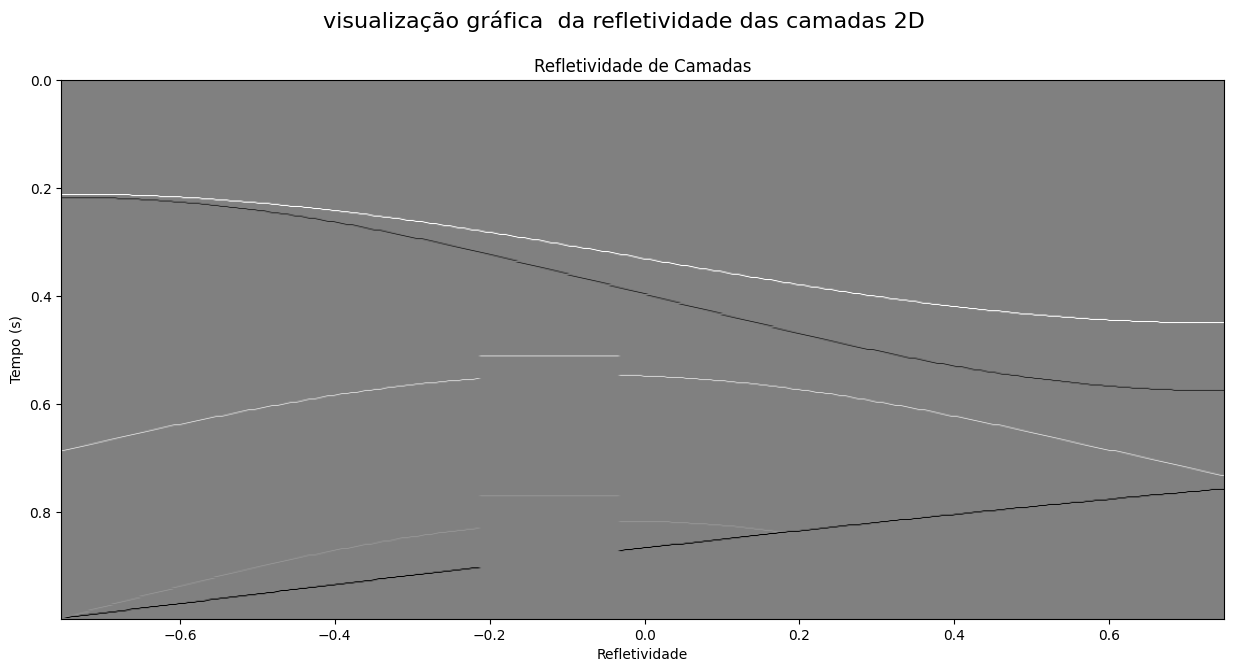

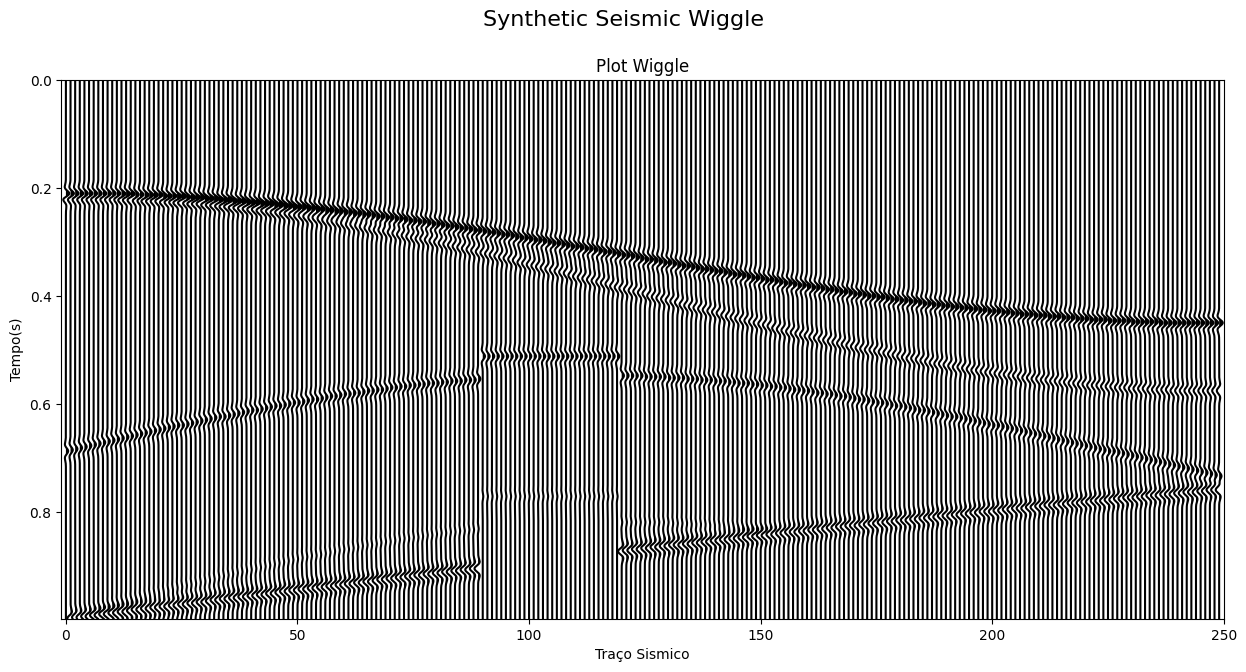

In [ ]:
# Plot dos graficos
plt.figure(figsize=(15,7))
plt.suptitle("visualização gráfica  da refletividade das camadas 2D", fontsize=16)
plt.imshow(refletividade, aspect='auto',
           extent=(np.min(refletividade),np.max(refletividade),
           np.max(t), np.min(t)), cmap='gray')
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade')
plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))
##plt.show()

# Inserir o dado do traço sismico e a base de tempo ou profundidade
plt.figure(figsize=(15, 7))
plt.title("Plot Wiggle")
plt.suptitle("Synthetic Seismic Wiggle", fontsize=16)
wiggle(TRACE, t, xx=None, color='k', sf=0.15, verbose=False)
plt.xlabel('Traço Sismico')
plt.ylabel('Tempo(s)')

plt.savefig("SyntheticSeismicWiggle.png")
plt.show()

## Outros Exemplos

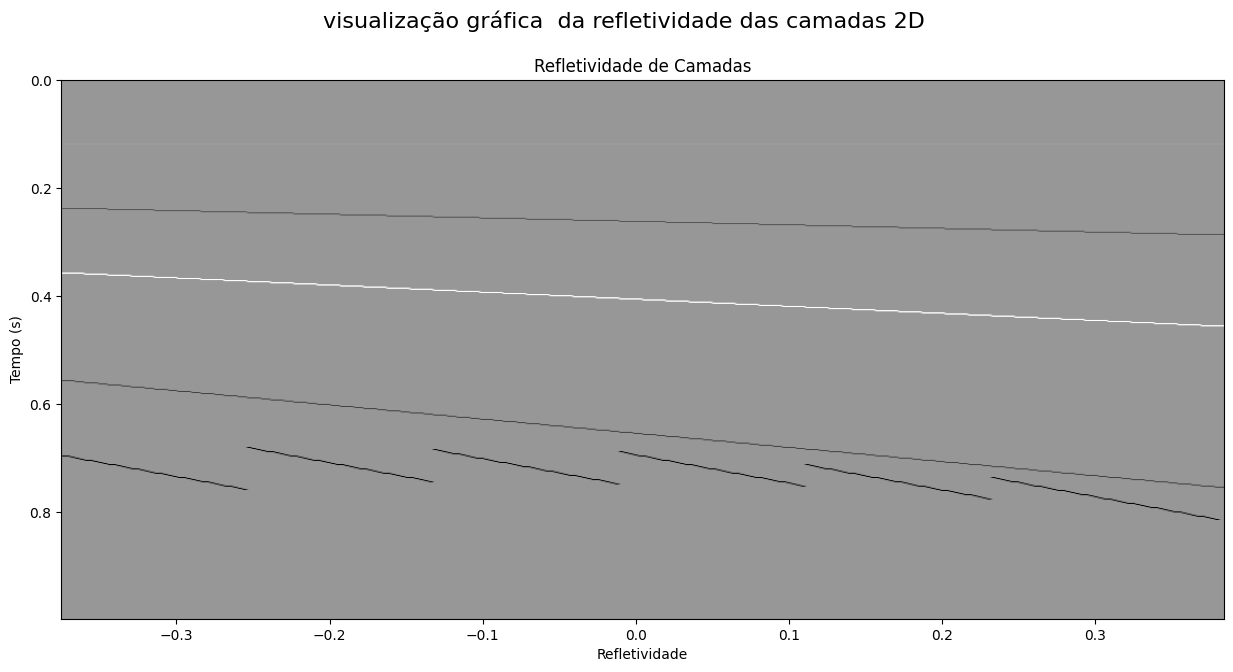

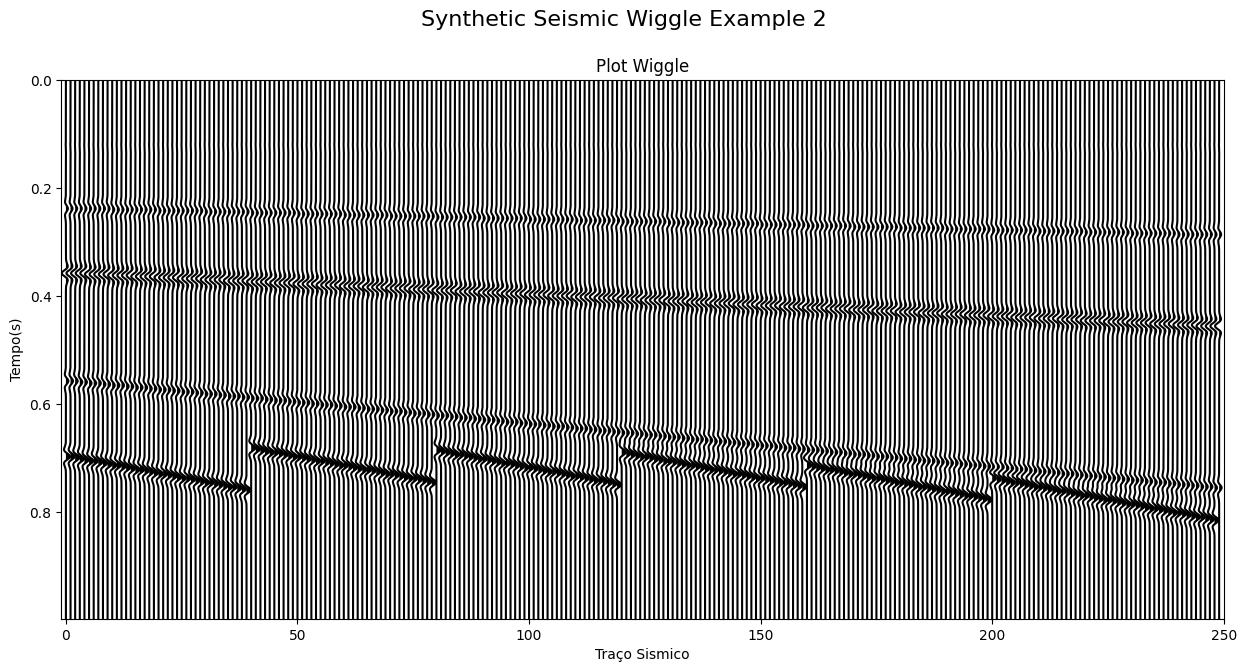

In [39]:
"""## Modelo Convolucional 2D
    Exemplo 2"""

# Velocidade e Densidade das camadas
vel1 = np.array([3250, 3200, 4000, 2250, 3250, 6000])  # Velocidade
den1 = np.array([2300, 2250, 2600, 2100, 2300, 2800])  # Densidade

velocidade1 = np.zeros((n, nx)) + vel1[0]
densidade1 = np.zeros((n, nx)) + den1[0]

horiz1 = np.zeros(nx,dtype='int')
horiz2 = np.copy(horiz1)
horiz3 = np.copy(horiz1)
horiz4 = np.copy(horiz1)
horiz5 = np.copy(horiz1)
horiz6 = np.copy(horiz1)
horiz7 = np.copy(horiz1)
horiz8 = np.copy(horiz1)
horiz9 = np.copy(horiz1)
horiz10 = np.copy(horiz1)

m = 0.8 # Inclinação

for i in range(nx):
    horiz1[i] = int(0 * i + 60)
    horiz2[i] = int(0.1 * i + 120)
    horiz3[i] = int(0.2 * i + 180)
    horiz4[i] = int(0.4 * i + 280)
    horiz5[i] = int(m * i + 350)
    horiz6[i] = int(m * i + 310)
    horiz7[i] = int(m * i + 280)
    horiz8[i] = int(m * i + 250)
    horiz9[i] = int(m * i + 230)
    horiz10[i] = int(m * i + 210)

for i in range(nx):
    for j in range(n):
        if (j >= horiz1[i]):
            velocidade1[j,i] = vel1[1]
            densidade1[j,i] = den1[1]
        if (j >= horiz2[i]):
            velocidade1[j,i] = vel1[2]
            densidade1[j,i] = den1[2]
        if (j >= horiz3[i]):
            velocidade1[j,i] = vel1[3]
            densidade1[j,i] = den1[3]
        if (j >= horiz4[i]):
            velocidade1[j,i] = vel1[4]
            densidade1[j,i] = den1[4]

        if (j >= horiz5[i]):
            velocidade1[j,i] = vel1[5]
            densidade1[j,i] = den1[5]
        if (j >= horiz6[i]):
            velocidade1[j,40:i] = vel1[5]
            densidade1[j,40:i] = den1[5]
        if (j >= horiz7[i]):
            velocidade1[j,80:i] = vel1[5]
            densidade1[j,80:i] = den1[5]
        if (j >= horiz8[i]):
            velocidade1[j,120:i] = vel1[5]
            densidade1[j,120:i] = den1[5]
        if (j >= horiz9[i]):
            velocidade1[j,160:i] = vel1[5]
            densidade1[j,160:i] = den1[5]
        if (j >= horiz10[i]):
            velocidade1[j,200:i] = vel1[5]
            densidade1[j,200:i] = den1[5]

#-------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------------------#

z2 = velocidade*densidade  # Calculo da Impedância

# Criando a matriz de refletividade
refletividades1 = []
for i in range(nx):
    refletividade1 = reflectivity(velocidade1[:, i], densidade1[:, i])
    refletividades1.append(refletividade1)

refletividade1 = np.array(refletividades1).T

# Traço Sismico
traces1 = []

for i in range(nx):
    trace1 = np.convolve(R, refletividade1[:, i], 'same')
    traces1.append(trace1)

TRACE1 = np.array(traces1).T

#-------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------------------#

# Plot dos graficos
plt.figure(figsize=(15,7))
plt.suptitle("visualização gráfica  da refletividade das camadas 2D", fontsize=16)
plt.imshow(refletividade1, aspect='auto',
           extent=(np.min(refletividade1),np.max(refletividade1),
           np.max(t), np.min(t)), cmap='Greys')
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade')
plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))

# Inserir o dado do traço sismico e a base de tempo ou profundidade
plt.figure(figsize=(15, 7))
plt.title("Plot Wiggle")
plt.suptitle("Synthetic Seismic Wiggle Example 2", fontsize=16)
wiggle(TRACE1, t, xx=None, color='k', sf=0.15, verbose=False)
plt.xlabel('Traço Sismico')
plt.ylabel('Tempo(s)')

plt.savefig("SyntheticSeismicWiggle_mod2.png")
plt.show()

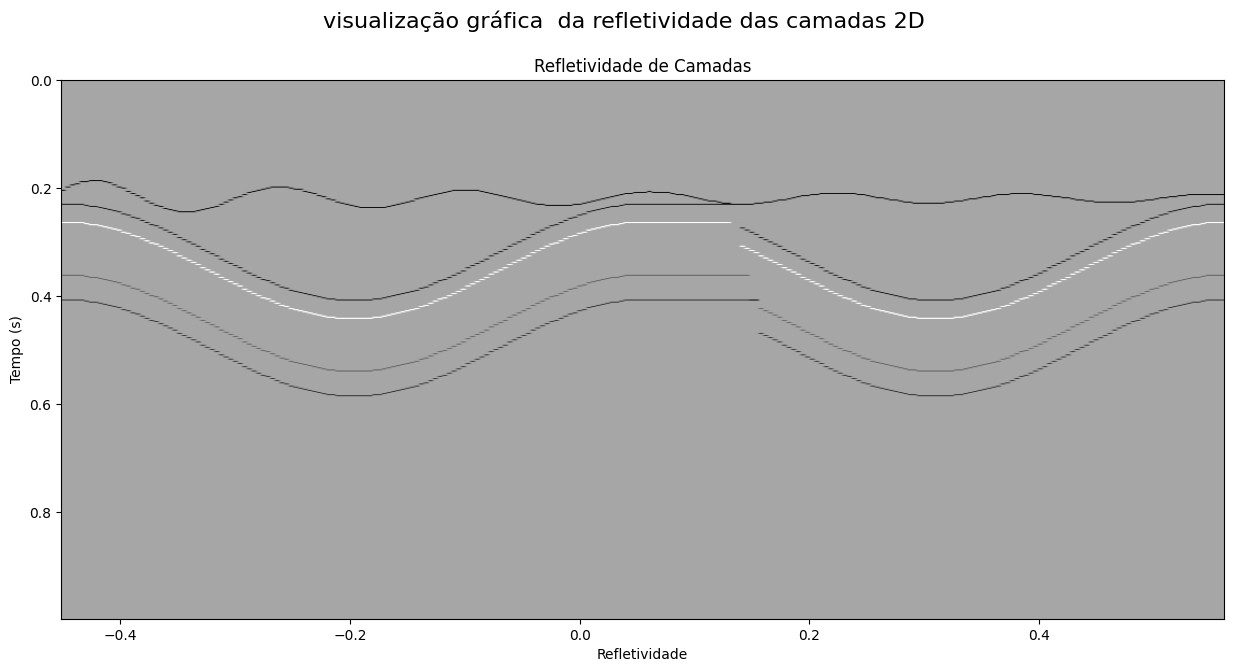

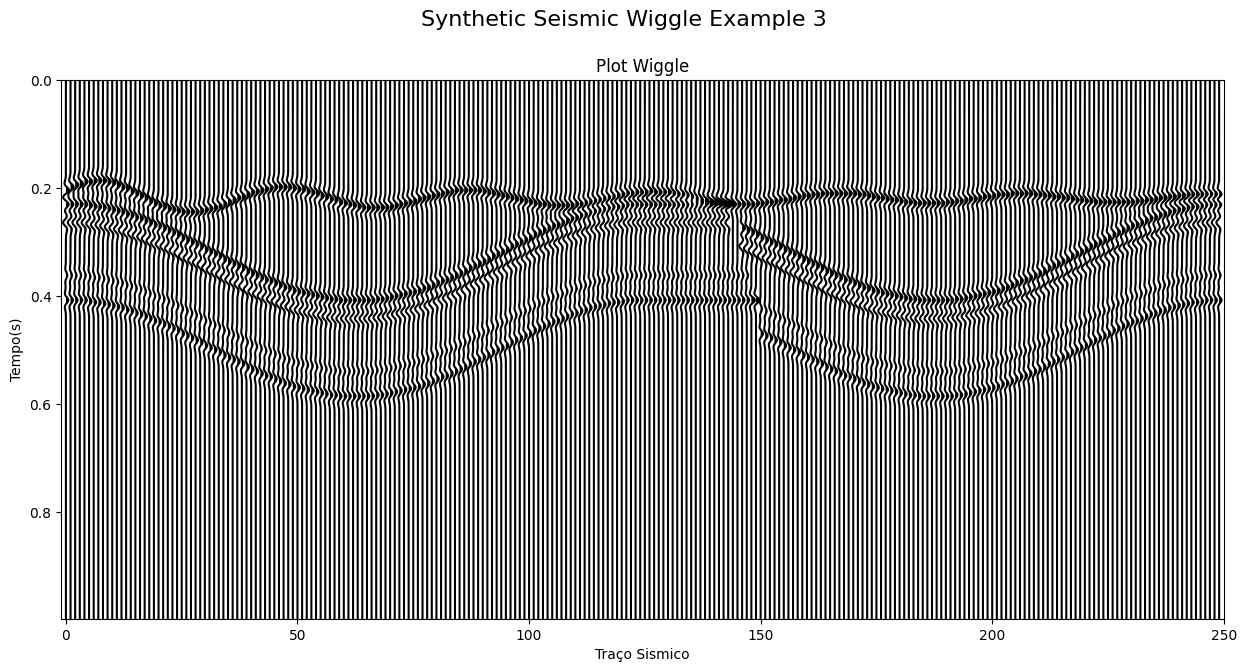

In [38]:
# EXEMPLO 3

# velocidades das camadas
# Velocidade e Densidade das camadas
vel2 = np.array([1500, 2000, 5000, 2250, 3250, 6000])  # Velocidade
den2 = np.array([1000, 2300, 2500, 2100, 2300, 2800])  # Densidade

velocidade2 = np.zeros((n, nx)) + vel2[0]
densidade2 = np.zeros((n, nx)) + den2[0]

h1 = np.zeros(nx,dtype='int')
h2 = np.zeros(nx,dtype='int')
h3 = np.zeros(nx,dtype='int')
h4 = np.zeros(nx,dtype='int')
h5 = np.zeros(nx,dtype='int')


z0, z1, z2, z3, z4, z5 = (n // 4.5), (n // 3.8), (n // 3.1), (n // 2.8), (n // 2.2), (n // 2)
height, height2 = 45, 180
L = (0.5 * nx)

for i in range(nx):
    h1[i] = int(z0 + height2 * np.sinc(2*np.pi*(i) / L + np.pi))
    h2[i] = int(z2 + height * np.cos(2*np.pi*(i) / L + np.pi))
    h3[i] = int(z3 + height * np.cos(2*np.pi*(i) / L + np.pi))
    h4[i] = int(z4 + height * np.cos(2*np.pi*(i) / L + np.pi))
    h5[i] = int(z5 + height * np.cos(2*np.pi*(i) / L + np.pi))


for i in range(nx):
    for j in range(n):
        if (j >= h1[i]):
            velocidade2[j,i] = vel2[1]
            densidade2[j,i] = den2[1]

        if (j >= h2[i]):
            velocidade2[j,i] = vel2[2]
            densidade2[j,i] = den2[2]
        if (j >= h2[i]):
            velocidade2[j,125:144] = vel2[2]
            densidade2[j,125:144] = den2[2]

        if (j >= h3[i]):
            velocidade2[j,i] = vel2[3]
            densidade2[j,i] = den2[3]
        if (j >= h3[i]):
            velocidade2[j,125:146] = vel2[3]
            densidade2[j,125:146] = den2[3]

        if (j >= h4[i]):
            velocidade2[j,i] = vel2[4]
            densidade2[j,i] = den2[4]
        if (j >= h4[i]):
            velocidade2[j,125:148] = vel2[4]
            densidade2[j,125:148] = den2[4]

        if (j >= h5[i]):
            velocidade2[j,i] = vel2[5]
            densidade2[j,i] = den2[5]
        if (j >= h5[i]):
            velocidade2[j,125:150] = vel2[5]
            densidade2[j,125:150] = den2[5]




# Criando a matriz de refletividade
refletividades2 = []
for i in range(nx):
    refletividade2 = reflectivity(velocidade2[:, i], densidade2[:, i])
    refletividades2.append(refletividade2)

refletividade2 = np.array(refletividades2).T

# Traço Sismico
traces2 = []

for i in range(nx):
    trace2 = np.convolve(R, refletividade2[:, i], 'same')
    traces2.append(trace2)

TRACE2 = np.array(traces2).T

# Plot dos graficos
plt.figure(figsize=(15,7))
plt.suptitle("visualização gráfica  da refletividade das camadas 2D", fontsize=16)
plt.imshow(refletividade2, aspect='auto',
           extent=(np.min(refletividade2),np.max(refletividade2),
           np.max(t), np.min(t)), cmap='Greys')
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade')
plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))

# Inserir o dado do traço sismico e a base de tempo ou profundidade
plt.figure(figsize=(15, 7))
plt.title("Plot Wiggle")
plt.suptitle("Synthetic Seismic Wiggle Example 3", fontsize=16)
wiggle(TRACE2, t, xx=None, color='k', sf=0.15, verbose=False)
plt.xlabel('Traço Sismico')
plt.ylabel('Tempo(s)')

plt.savefig("SyntheticSeismicWiggle_ex3.png")
plt.show()



# Conclusão:
Portanto, por meio de um modelo convolucional 2D que utiliza uma wavelet Ricker como pulso de entrada e convolvendo com a função de refletividade,os sismogramas foram gerados,  a partir de exemplos de estruturas geológicas. Ao utilizar o 'wiggle' nos sismogramas, foi possível uma análise mais clara e intuitiva das reflexões presentes nas seções sísmicas, facilitando a identificação de eventos geológicos significativos. Ao visualizar a seção sísmica resultante, torna-se possível observar as características geológicas nos sismogramas, destacando a capacidade do modelo convolucional 2D em capturar informações relevantes.

Os sismogramas foram construídos no domínio do tempo. Como objetivo futuro, a próxima etapa visa realizar a conversão tempo-profundidade e vice-versa, além de abordar outras etapas importantes na modelagem e processamento sísmico.



